# Naive Bayes algorithms:
Naive Bayes is a machine learning classification algorithm that predicts the category of a data point using "probability". It assumes that all features are independent of each other. Naive Bayes performs well in many real-world applications such as spam filtering, document categorization and sentiment analysis.

The Naive Bayes Classifier is a simple "probabilistic classifier" and it has very few number of parameters which are used to build the ML models that can predict at a faster speed than other classification algorithms.
It is a probabilistic classifier because it assumes that 'one feature in the model is independent of existence of another feature'. In other words, each feature contributes to the predictions with no relation between each other.
Naive Bayes Algorithm is used in spam filtration, Sentimental analysis, classifying articles and many more.

# References:-
🌐 Online Tutorials / Blogs

Scikit-learn Documentation – Naive Bayes
https://scikit-learn.org/stable/modules/naive_bayes.html

Towards Data Science – Naive Bayes Explained
https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

Analytics Vidhya – Naive Bayes Classifier
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

In [33]:
import pandas as pd

# Load dataset (you can download sms spam dataset from UCI ML repo or Kaggle)
df = pd.read_csv(r"C:\Users\ASUS\Desktop\cleaned_DataAnalysis\archive (9).zip")


In [34]:
print(df.head())

   Unnamed: 0 spamORham                                            Message
0           0       ham  Go until jurong point, crazy.. Available only ...
1           1       ham                      Ok lar... Joking wif u oni...
2           2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3           3       ham  U dun say so early hor... U c already then say...
4           4       ham  Nah I don't think he goes to usf, he lives aro...


In [35]:
df=df.rename(columns={'spamORham':'label'})
df.head()

,Unnamed: 0,label,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df.columns

Index(['Unnamed: 0', 'label', 'Message'], dtype='object')

In [37]:
import pandas as pd
import numpy as np
import re
from collections import Counter

# ---------------------------
# Load dataset
# ---------------------------
df = pd.read_csv(r"C:\Users\ASUS\Desktop\cleaned_DataAnalysis\archive (9).zip", encoding="latin-1")



In [38]:
df.columns

Index(['Unnamed: 0', 'spamORham', 'Message'], dtype='object')

In [39]:
df.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df = df[['spamORham', 'Message']]
df.columns = ['label', 'message']

In [41]:
df.columns

Index(['label', 'message'], dtype='object')

In [42]:

# Keep only required columns (spam/ham + Message)
df = df[['label', 'message']]

# Rename for convenience
df.columns = ['label', 'message']

# Map ham→0, spam→1
df['label'] = df['label'].map({"ham":0, "spam":1})

# ---------------------------
# Text Preprocessing
# ---------------------------
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters
    return text.split()

df['tokens'] = df['message'].apply(preprocess)

print(df.head())

   label                                            message  \
0      0  Go until jurong point, crazy.. Available only ...   
1      0                      Ok lar... Joking wif u oni...   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...   
3      0  U dun say so early hor... U c already then say...   
4      0  Nah I don't think he goes to usf, he lives aro...   

                                              tokens  
0  [go, until, jurong, point, crazy, available, o...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, in, a, wkly, comp, to, win, fa, ...  
3  [u, dun, say, so, early, hor, u, c, already, t...  
4  [nah, i, dont, think, he, goes, to, usf, he, l...  


In [43]:
y=df["label"].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [44]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Drop index col if present
df = df[["label", "message", "tokens"]]


In [45]:
# 2. Build vocabulary

vocab = sorted(set(word for tokens in df["tokens"] for word in tokens))
vocab_index = {word: i for i, word in enumerate(vocab)}
V = len(vocab)


In [46]:
# 3. Vectorize function
# ------------------------------
def vectorize(tokens):
    vec = np.zeros(V)
    counts = Counter(tokens)
    for word, count in counts.items():
        if word in vocab_index:
            vec[vocab_index[word]] = count
    return vec


In [47]:
X = np.array([vectorize(tokens) for tokens in df["tokens"]])


y = np.array(df["label"])

# ------------------------------
# 4. Train/test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Let's first understand the mathematical concepts and formulas behind the Naive Bias AlgorithmL:-

# 📘 Naive Bayes Formulas (for Text Classification)

# 1. Bayes’ Theorem

#$$P(y \mid x) = \frac{P(x \mid y) \cdot P(y)}{P(x)}$$

#Core formula.

#For classification, we only need the numerator (since  is same for all classes).



#---

# 2. Prediction Rule

#$$\hat{y} = \arg\max_{c \in \{classes\}} P(y=c) \cdot \prod_{i=1}^{n} P(x_i \mid y=c)$$

#Choose the class  that maximizes posterior probability.

#Naive assumption: features (words) are independent given class.



#---

# 3. Prior Probability

#$$P(y=c) = \frac{\text{Number of documents in class } c}{\text{Total number of documents}}$$

#Fraction of messages that belong to a class (spam/ham).



#---

# 4. Conditional Probability (Word likelihood with Laplace smoothing)

#$$P(word \mid class) = \frac{\text{Count(word in class)} + 1}{\text{Total words in class} + |V|}$$

#= vocabulary size (unique words).

#+1 = Laplace smoothing (avoids zero probability).



#---

# 5. Document Probability (Log space)

#$$\log P(y=c \mid x) \propto \log P(y=c) + \sum_{i=1}^{n} x_i \cdot \log P(word_i \mid y=c)$$

#Multiply probabilities → take logs to avoid underflow.

#= word count in the message.

# Add log-probabilities instead of multiplying raw probabilities.



#---

# 6. Decision Rule

#$$\hat{y} = \arg\max_{c} \bigg[ \log P(y=c) + \sum_{i=1}^{n} x_i \cdot \log P(word_i \mid y=c) \bigg]$$

#Final classification: pick the class with the highest log score.

# Now,Let's build the Naive Bayes Model using the concepts explained above:-

In [48]:
# 5. Naive Bayes Implementation
# ------------------------------
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.class_priors = np.zeros(n_classes)
        self.word_counts = np.zeros((n_classes, n_features))

        for c in self.classes:
            X_c = X[y == c]
            self.class_priors[c] = X_c.shape[0] / n_samples
            self.word_counts[c, :] = np.sum(X_c, axis=0) + 1  # Laplace smoothing

        self.word_probs = self.word_counts / self.word_counts.sum(axis=1, keepdims=True)

    def predict(self, X):
        preds = []
        for x in X:
            class_scores = []
            for c in self.classes:
                prior = np.log(self.class_priors[c])
                cond = np.sum(x * np.log(self.word_probs[c]))
                class_scores.append(prior + cond)
            preds.append(np.argmax(class_scores))
        return np.array(preds)

# ------------------------------


In [49]:
# 6. Train & Evaluate
# ------------------------------
nb = NaiveBayes()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9721973094170404

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.88      0.91      0.90       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [50]:
import ast

# If tokens are stored as strings like "['word1','word2']"
if isinstance(df["tokens"].iloc[0], str):
    df["tokens"] = df["tokens"].apply(ast.literal_eval)

In [51]:
print(df["tokens"].head())

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, dont, think, he, goes, to, usf, he, l...
Name: tokens, dtype: object


In [52]:
print(df["label"].unique())

[0 1]


In [53]:
spam_tokens = [word for tokens in df[df['label']=="spam"]["tokens"] for word in tokens]
ham_tokens  = [word for tokens in df[df['label']=="ham"]["tokens"] for word in tokens]

print("Spam tokens:", len(spam_tokens))
print("Ham tokens:", len(ham_tokens))

Spam tokens: 0
Ham tokens: 0


# Now,Let's learn with some visualizations:

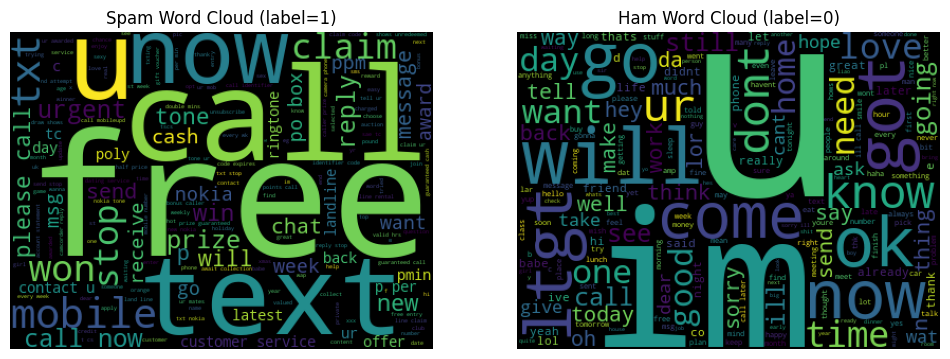

In [54]:
import matplotlib.pyplot as plt
from collections import Counter
import ast
from wordcloud import WordCloud

# If tokens are strings like "['win','money']", convert to lists
if isinstance(df["tokens"].iloc[0], str):
    df["tokens"] = df["tokens"].apply(ast.literal_eval)

# Separate tokens for ham (0) and spam (1)
ham_tokens  = [word for tokens in df[df['label']==0]["tokens"] for word in tokens]
spam_tokens = [word for tokens in df[df['label']==1]["tokens"] for word in tokens]


# --- 3. Word Clouds ---
plt.figure(figsize=(12,6))

if spam_tokens:
    plt.subplot(1,2,1)
    plt.imshow(WordCloud(width=400, height=300).generate(" ".join(spam_tokens)))
    plt.axis("off")
    plt.title("Spam Word Cloud (label=1)")

if ham_tokens:
    plt.subplot(1,2,2)
    plt.imshow(WordCloud(width=400, height=300).generate(" ".join(ham_tokens)))
    plt.axis("off")
    plt.title("Ham Word Cloud (label=0)")

plt.show()

In [55]:
print("Ham tokens count:", len(ham_tokens))
print("Spam tokens count:", len(spam_tokens))
print("Unique ham words:", len(set(ham_tokens)))
print("Unique spam words:", len(set(spam_tokens)))
print("Top ham words:", Counter(ham_tokens).most_common(5))
print("Top spam words:", Counter(spam_tokens).most_common(5))

Ham tokens count: 66523
Spam tokens count: 15806
Unique ham words: 7312
Unique spam words: 2254
Top ham words: [('i', 2185), ('you', 1837), ('to', 1554), ('the', 1119), ('a', 1055)]
Top spam words: [('to', 686), ('a', 378), ('call', 350), ('you', 287), ('your', 263)]


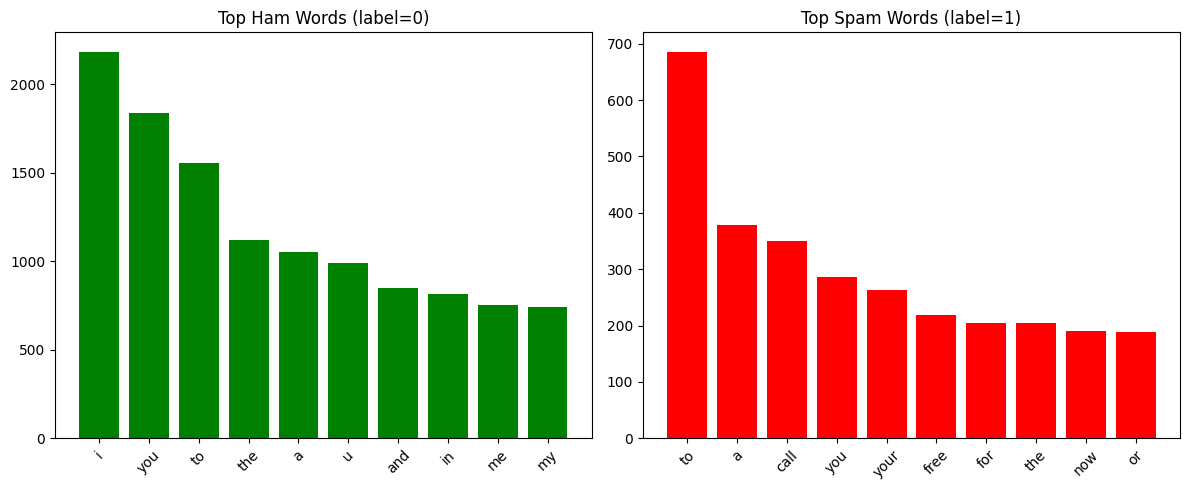

In [56]:

ham_counts  = Counter(ham_tokens).most_common(10) if ham_tokens else []
spam_counts = Counter(spam_tokens).most_common(10) if spam_tokens else []

fig, axes = plt.subplots(1, 2, figsize=(12,5))

if ham_counts:
    ham_words, ham_freqs = zip(*ham_counts)
    axes[0].bar(ham_words, ham_freqs, color="green")
    axes[0].set_title("Top Ham Words (label=0)")
    axes[0].tick_params(axis='x', rotation=45)
else:
    axes[0].text(0.5, 0.5, "No Ham Words", ha='center', va='center')
    axes[0].set_title("Top Ham Words (label=0)")

if spam_counts:
    spam_words, spam_freqs = zip(*spam_counts)
    axes[1].bar(spam_words, spam_freqs, color="red")
    axes[1].set_title("Top Spam Words (label=1)")
    axes[1].tick_params(axis='x', rotation=45)
else:
    axes[1].text(0.5, 0.5, "No Spam Words", ha='center', va='center')
    axes[1].set_title("Top Spam Words (label=1)")

plt.tight_layout()
plt.show()

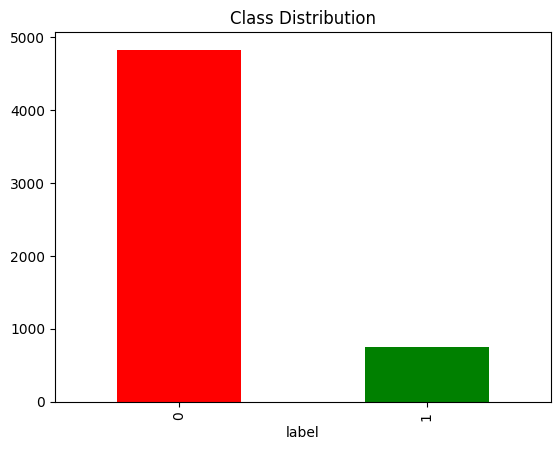

In [57]:
df["label"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Class Distribution")
plt.show()

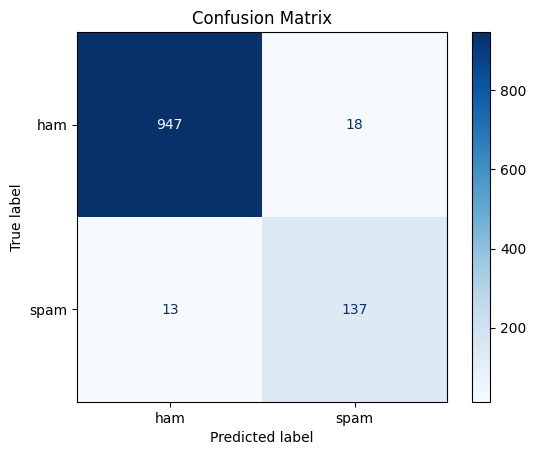

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["ham", "spam"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [59]:
# Conclusion:-
#hence,we implemented Naive Bayes Model on the SpamORham dataset with an accuracy of ~97%.
#What's the meaning of the word "Naive Bayes" in this model?
#Ans:-'Naive' meaning ecah feature is independent of ohers,This algorithm strictly assumes that every feature is independent of another one.
#'Bayes' is because this model uess Bayes's Theorem for making the predictions.

#Advantages of Naive Bayes Classifier
#Easy to implement and computationally efficient.
#Effective in cases with a large number of features.
#Performs well even with limited training data.
#It performs well in the presence of categorical features.
#For numerical features data is assumed to come from normal distributions

#Disadvantages of Naive Bayes Classifier
#Assumes that features are independent, which may not always hold in real-world data.
#Can be influenced by irrelevant attributes.
#May assign zero probability to unseen events, leading to poor generalization.

#Applications of Naive Bayes Classifier
#Spam Email Filtering: Classifies emails as spam or non-spam based on features.
#Text Classification: Used in sentiment analysis, document categorization, and topic classification.
#Medical Diagnosis: Helps in predicting the likelihood of a disease based on symptoms.